# Naive Bayes (ALGORITMO)

### Import

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

### Análise Exploratória de Dados

In [205]:
emails = pd.read_csv('spam_or_not_spam.csv')

In [206]:
emails.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [207]:
emails.shape

(3000, 2)

In [208]:
emails_dedupl = emails.drop_duplicates()

In [209]:
emails_filtered = emails_dedupl.dropna()

In [210]:
emails_filtered.shape

(2872, 2)

### Tratamento de Texto

In [211]:
df = emails_filtered.copy()

In [212]:
stemmer = PorterStemmer()

In [213]:
nltk.download("stopwords")
stopwords = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joaov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [214]:
df['unstemmed'] = df['email'].str.split()

In [215]:
df['unstemmed'] = df['unstemmed'].apply(lambda x: [re.sub(r"[^A-Za-z]", " ", y).lower() for y in x])

In [216]:
df['stemmed'] = df['unstemmed'].apply(lambda x: [stemmer.stem(y) for y in x if not y in stopwords])

In [217]:
df['stemmed_stopwords'] = df['stemmed'].apply(lambda x: [item for item in x if item not in stopwords])

In [218]:
df['features'] = df['stemmed_stopwords'].apply(lambda x: ' '.join(x))

In [219]:
df_prod = df[['features', 'label']]

In [220]:
df_prod.head()

,features,label
0,date wed number aug number number number numbe...,0
1,martin post tasso papadopoulo greek sculptor b...,0
2,man threaten explos moscow thursday august num...,0
3,klez viru die alreadi prolif viru ever klez co...,0
4,ad cream spaghetti carbonara effect pasta make...,0


In [221]:
df_prod.shape

(2872, 2)

### Codificações Baseadas em Palavras

In [222]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_prod)
train, validation = train_test_split(train, test_size=0.2)
print('Entradas por Dataset')
print('Dataset de Treino: ', len(train), 'linhas.')
print('Dataset de Validação: ', len(validation), 'linhas.')
print('Dataset de Teste: ', len(test), 'linhas.')

Entradas por Dataset
Dataset de Treino:  1723 linhas.
Dataset de Validação:  431 linhas.
Dataset de Teste:  718 linhas.


In [223]:
train.head()

,features,label
1193,info number number gst xml registry rebuild nu...,0
1352,justin mason wrote ok guy reckon good enough m...,0
369,well beberg unless realli anim actual hold tru...,0
279,mon oct number number number number numberpm n...,0
231,url big cat loos britain breed way toward reco...,0


In [224]:
train_ham = train[train['label'] == 0]
train_spam = train[train['label'] == 1]

In [225]:
print("Treino #ham: ", len(train_ham))
print("Treino #spam: ", len(train_spam))

Treino #ham:  1463
Treino #spam:  260


In [226]:
oversampling_factor = len(train_ham) // len(train_spam) # 5

In [227]:
train_spam = train_spam.sample(n=len(train_spam) * oversampling_factor,
                               replace=True)

In [228]:
train = pd.concat([train_ham, train_spam])

# Naive Bayes

In [229]:

X_train = train['features']
y_train = train['label']

X_test = test['features']
y_test = test['label']


In [230]:

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [231]:
print(X_train_vectorized)

  (0, 6776)	2
  (0, 9526)	10
  (0, 5832)	3
  (0, 15892)	1
  (0, 11721)	1
  (0, 11598)	1
  (0, 10769)	3
  (0, 15102)	3
  (0, 7839)	5
  (0, 7859)	2
  (0, 4730)	1
  (0, 8008)	2
  (0, 4442)	2
  (0, 11585)	1
  (0, 7843)	1
  (0, 14805)	1
  (0, 13868)	1
  (0, 16065)	1
  (0, 3135)	1
  (0, 12851)	1
  (0, 2378)	1
  (0, 14685)	1
  (0, 15086)	1
  (0, 15244)	3
  (0, 5440)	1
  :	:
  (2762, 7975)	2
  (2762, 8233)	2
  (2762, 4224)	4
  (2762, 11801)	3
  (2762, 10746)	2
  (2762, 11607)	1
  (2762, 10347)	1
  (2762, 8586)	1
  (2762, 12629)	1
  (2762, 13577)	1
  (2762, 9909)	2
  (2762, 4047)	1
  (2762, 11841)	1
  (2762, 15714)	1
  (2762, 13974)	1
  (2762, 4340)	1
  (2762, 2416)	2
  (2762, 4339)	1
  (2762, 1156)	1
  (2762, 10027)	1
  (2762, 7186)	1
  (2762, 10226)	1
  (2762, 6476)	15
  (2762, 1167)	1
  (2762, 16031)	1


In [232]:
print(y_train)

1193    0
1352    0
369     0
279     0
231     0
       ..
2764    1
2739    1
2502    1
2564    1
2873    1
Name: label, Length: 2763, dtype: int64


In [233]:
classifier = MultinomialNB()

In [234]:
classifier.fit(X_train_vectorized, y_train)

c:\Users\joaov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\joaov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


MultinomialNB()

In [239]:
y_pred = classifier.predict(X_test_vectorized)
print('Acurácia: ', accuracy_score(y_test, y_pred))

Acurácia:  0.9818941504178273


c:\Users\joaov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\joaov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\joaov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\joaov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

c:\Users\joaov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\joaov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\joaov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\joaov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

<Axes: >

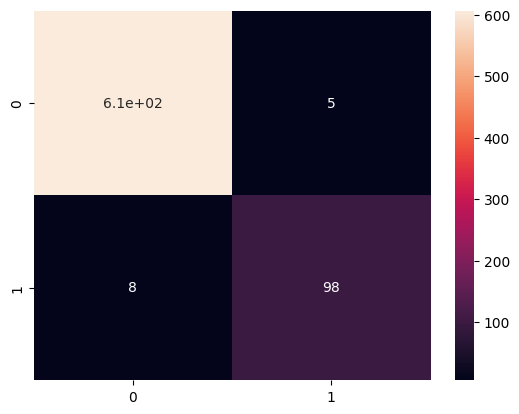

In [236]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
